In [8]:
import sys
sys.version
import argparse
import gym
import itertools
from collections import defaultdict
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import os.path as osp
import json
from tinkerbell.extras.read_tb import read_tb
from rl_algs import bench

In [9]:
allresults = []
rootdir = "./atari50"
assert osp.exists(rootdir)

In [10]:
for dirname, _, files in os.walk(rootdir, followlinks=True):
    if "metadata.json" in files:
        print("loading from", dirname)
        with open(osp.join(dirname, "metadata.json"), "r") as fh:
            metadata = json.load(fh)
        tbdir = osp.join(dirname, "tb")
        try:
            gymstats = bench.monitor.load_results(dirname)
        except Exception:
            print('problem with', dirname)
            pass
        else:
            allresults.append({"metadata":metadata, 'gym':gymstats, 'dirname':dirname})

loading from ./atari50/a2c/aliennoframeskip-v3-0
loading from ./atari50/a2c/aliennoframeskip-v3-1
loading from ./atari50/a2c/aliennoframeskip-v3-2
loading from ./atari50/a2c/amidarnoframeskip-v3-0
loading from ./atari50/a2c/amidarnoframeskip-v3-1
loading from ./atari50/a2c/amidarnoframeskip-v3-2
loading from ./atari50/a2c/assaultnoframeskip-v3-0
loading from ./atari50/a2c/assaultnoframeskip-v3-1
loading from ./atari50/a2c/assaultnoframeskip-v3-2
loading from ./atari50/a2c/asterixnoframeskip-v3-0
loading from ./atari50/a2c/asterixnoframeskip-v3-1
loading from ./atari50/a2c/asterixnoframeskip-v3-2
loading from ./atari50/a2c/asteroidsnoframeskip-v3-0
loading from ./atari50/a2c/asteroidsnoframeskip-v3-1
loading from ./atari50/a2c/asteroidsnoframeskip-v3-2
loading from ./atari50/a2c/atlantisnoframeskip-v3-0
loading from ./atari50/a2c/atlantisnoframeskip-v3-1
loading from ./atari50/a2c/atlantisnoframeskip-v3-2
loading from ./atari50/a2c/bankheistnoframeskip-v3-0
loading from ./atari50/a2c/ba

loading from ./atari50/acer/atlantisnoframeskip-v4-0
loading from ./atari50/acer/atlantisnoframeskip-v4-1
loading from ./atari50/acer/atlantisnoframeskip-v4-2
loading from ./atari50/acer/bankheistnoframeskip-v4-0
loading from ./atari50/acer/bankheistnoframeskip-v4-1
loading from ./atari50/acer/bankheistnoframeskip-v4-2
loading from ./atari50/acer/battlezonenoframeskip-v4-0
loading from ./atari50/acer/battlezonenoframeskip-v4-1
loading from ./atari50/acer/battlezonenoframeskip-v4-2
loading from ./atari50/acer/beamridernoframeskip-v4-0
loading from ./atari50/acer/beamridernoframeskip-v4-1
loading from ./atari50/acer/beamridernoframeskip-v4-2
loading from ./atari50/acer/bowlingnoframeskip-v4-0
loading from ./atari50/acer/bowlingnoframeskip-v4-1
loading from ./atari50/acer/bowlingnoframeskip-v4-2
loading from ./atari50/acer/boxingnoframeskip-v4-0
loading from ./atari50/acer/boxingnoframeskip-v4-1
loading from ./atari50/acer/boxingnoframeskip-v4-2
loading from ./atari50/acer/breakoutnoframe

loading from ./atari50/acktr/breakoutnoframeskip-v3-1324
loading from ./atari50/acktr/breakoutnoframeskip-v3-1325
loading from ./atari50/acktr/centipedenoframeskip-v4-0
loading from ./atari50/acktr/centipedenoframeskip-v4-1
loading from ./atari50/acktr/centipedenoframeskip-v4-2
loading from ./atari50/acktr/centipedenoframeskip-v4-3
loading from ./atari50/acktr/choppercommandnoframeskip-v4-0
loading from ./atari50/acktr/choppercommandnoframeskip-v4-1
loading from ./atari50/acktr/choppercommandnoframeskip-v4-2
loading from ./atari50/acktr/choppercommandnoframeskip-v4-3
loading from ./atari50/acktr/crazyclimbernoframeskip-v4-0
loading from ./atari50/acktr/crazyclimbernoframeskip-v4-1
loading from ./atari50/acktr/crazyclimbernoframeskip-v4-2
loading from ./atari50/acktr/crazyclimbernoframeskip-v4-3
loading from ./atari50/acktr/demonattacknoframeskip-v4-0
loading from ./atari50/acktr/demonattacknoframeskip-v4-1
loading from ./atari50/acktr/demonattacknoframeskip-v4-2
loading from ./atari50/

loading from ./atari50/smallbatch/asteroidsnoframeskip-v4-1
loading from ./atari50/smallbatch/asteroidsnoframeskip-v4-2
loading from ./atari50/smallbatch/atlantisnoframeskip-v4-0
loading from ./atari50/smallbatch/atlantisnoframeskip-v4-1
loading from ./atari50/smallbatch/atlantisnoframeskip-v4-2
loading from ./atari50/smallbatch/bankheistnoframeskip-v4-0
loading from ./atari50/smallbatch/bankheistnoframeskip-v4-1
loading from ./atari50/smallbatch/bankheistnoframeskip-v4-2
loading from ./atari50/smallbatch/battlezonenoframeskip-v4-0
loading from ./atari50/smallbatch/battlezonenoframeskip-v4-1
loading from ./atari50/smallbatch/battlezonenoframeskip-v4-2
loading from ./atari50/smallbatch/beamridernoframeskip-v4-0
loading from ./atari50/smallbatch/beamridernoframeskip-v4-1
loading from ./atari50/smallbatch/beamridernoframeskip-v4-2
loading from ./atari50/smallbatch/bowlingnoframeskip-v4-0
loading from ./atari50/smallbatch/bowlingnoframeskip-v4-1
loading from ./atari50/smallbatch/bowlingnof

/Users/ywu-openai/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Alien
Amidar
Assault
Asterix
Asteroids
Atlantis
BankHeist
BattleZone
BeamRider
Bowling
Boxing
Breakout
Centipede
ChopperCommand
CrazyClimber
DemonAttack
DoubleDunk
Enduro
FishingDerby
Freeway
Frostbite
Gopher
Gravitar
IceHockey
Jamesbond
Kangaroo
Skipping
Krull
KungFuMaster
MontezumaRevenge
MsPacman
NameThisGame
Pitfall
Pong
PrivateEye
Qbert
Riverraid
RoadRunner
Robotank
Seaquest
SpaceInvaders
StarGunner
Tennis
TimePilot
Tutankham
UpNDown
Venture
VideoPinball
WizardOfWor
Zaxxon


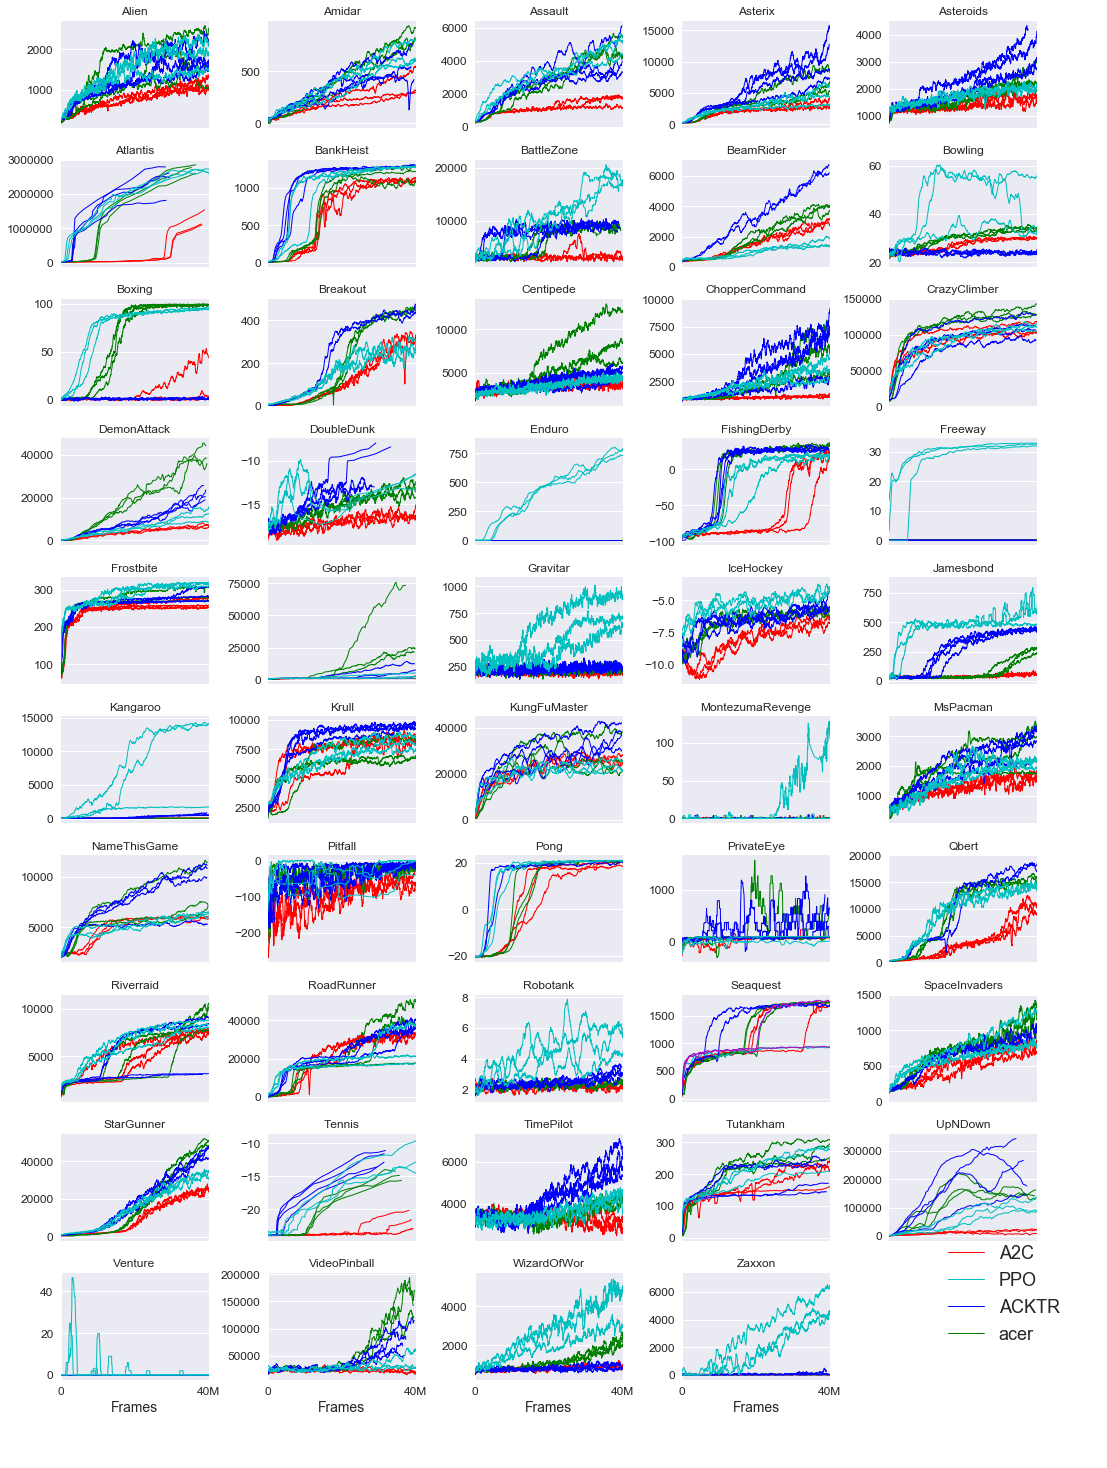

In [16]:
%matplotlib inline

plt.close('all')
params = {
   'axes.labelsize': 14,
   'text.fontsize': 12,
   'legend.fontsize': 14,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [6, 18]
   }
import seaborn
matplotlib.rcParams.update(params)
plt.close('all')
import matplotlib.gridspec as gridspec
plt.figure(figsize=(7*2.5,10*2.5))
gs = gridspec.GridSpec(10, 5, wspace=0.4, hspace=0.3)

getsplitkey = lambda m : m['variant']['env_id'][:-14]
split2results = defaultdict(list)
for result in allresults:
    split2results[getsplitkey(result["metadata"])].append(result)
from matplotlib import colors as mcolors
colors = 'rgbcmyk'
linestyles = ['-', '--']
colorlss = iter([(color,ls) for ls in linestyles for color in colors])
alg2colorls = {}
downsample=5
# plt.figure(figsize=(14,14))
count = -1
# sprows, spcols = (12,4)
for (split, results) in sorted(split2results.items()):
    count += 1
    plt.subplot(gs[count])
    print(split)
    # maxt = max(result['progress']["TimestepsSoFar"].iat[-1] for result in results)
    maxt = 1e6
    curve2xys = defaultdict(list)
    curve2line = {}
    curve2variant = {}
#     plt.figure(figsize=(8,8))
    alg2line = {}
    for result in results:
        alg = result['dirname'].split('/')[-2]
        if alg.startswith('ppo-best'):
#             alg = 'PPO'
            continue
        elif alg.startswith('a2c'):
            alg = 'A2C'        
        elif alg.startswith('smallbatch'):
            alg = 'PPO'
        elif alg.startswith('acktr'):
            alg = 'ACKTR'
        if 'lrelu' in alg or 'halfbatch' in alg  or 'leak' in alg or 'noann' in alg or 'epsann' in alg: continue
        gymstats = result["gym"]
        x = np.cumsum(gymstats["episode_lengths"])
        halfwidth = 50
        convkernel = np.ones(2 * halfwidth+1)
        y = np.array(gymstats['episode_rewards'])
        ysmoo = np.zeros_like(y)
        if len(ysmoo) < 2*halfwidth+1:
            print("Skipping")
            continue
        ysmoo[:] = np.nan
        ysmoo[:] = np.convolve(y, convkernel,mode='same') / np.convolve(np.ones_like(y), convkernel, mode='same')
        if alg in alg2colorls:
            color,ls = alg2colorls[alg]
        else:
            alg2colorls[alg] = color,ls = next(colorlss)
        line, = plt.plot(x[::downsample],ysmoo[::downsample], color=color, linestyle=ls,linewidth=1)
        alg2line[alg] = line        
    ax = plt.gca()
    ax.set_title(split)
    ax.set_xticks([])
    if split =='SpaceInvaders':
        ax.set_ylim(0,1500)
    if split =='Breakout':
        ax.set_ylim(0,500)
    if split =='Qbert':
        ax.set_ylim(0,20000)
    ax.set_xlim(0, 40e6)
    ax.set_xticklabels(["0", "40M"])    
#     plt.tight_layout()
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
        ax.set_xticks([0, 40e6])
        ax.set_xlabel("Frames")
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)  

plt.gcf().legend(alg2line.values(), alg2line.keys(), loc=(.85,.08), fontsize=18)

plt.savefig('atari-more-comparisons.pdf', bbox_inches='tight')
plt.show()